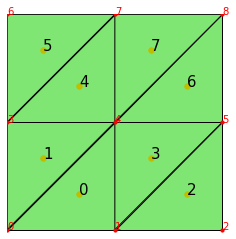

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import TriangleMesh

node = np.array([[0,0],
                [1,0],
                [2,0],
                [0,1],
                [1,1],
                [2,1],
                [0,2],
                [1,2],
                [2,2]], dtype=np.float64) 
node = node / 2
cell = np.array([[0,1,4],
                [0,4,3],
                [1,2,5],
                [1,5,4],
                [3,4,7],
                [3,7,6],
                [4,5,8],
                [4,8,7]], dtype=np.int64)

## [4,nn] 返回各个区间都有哪些点
def getWhichCellNode(node):
    isWhichCellNode = np.zeros((4,node.shape[0]), dtype=bool)
    for i in range(node.shape[0]):
        a = node[i, 0] - 0
        b = node[i, 1] - 0
        if a <= 0.5 and b <= 0.5:
            isWhichCellNode[0,i] = True
        if a >= 0.5 and b <= 0.5:
            isWhichCellNode[1,i] = True
        if a <= 0.5 and b >= 0.5:
            isWhichCellNode[2,i] = True
        if a >= 0.5 and b >= 0.5:
            isWhichCellNode[3,i] = True
    index = np.array([np.where(isWhichCellNode[0] == True)
                      , np.where(isWhichCellNode[1] == True)
                      ,np.where(isWhichCellNode[2] == True)
                      ,np.where(isWhichCellNode[3] == True)])
    nn = index.shape[2]
    index = index.reshape(4,nn)
    return index

def getTransformCellNodeIndex(index):
    nn = index.shape[1]
    transformIndex = np.zeros((4,nn,2), dtype=np.int64)
    transformIndex[:,:,0] = 2 * index
    transformIndex[:,:,1] = 2 * index + 1
    transformIndex = transformIndex.reshape(4,2*nn)
    return transformIndex

n = 0
mesh = TriangleMesh(node, cell)
mesh.uniform_refine(n)

fig = plt.figure()
ax = fig.gca()

mesh.add_plot(ax)
mesh.find_node(ax, showindex=True)
mesh.find_cell(ax, showindex=True)

In [46]:
index = getWhichCellNode(node)

for i in range(4):
    print("index[{}]= {}".format(i, index[i]))
    
transformIndex = getTransformCellNodeIndex(index)
for i in range(4):
    print("TransformCellNode[{}]= {}".format(i, transformIndex[i]))

index[0]= [0 1 3 4]
index[1]= [1 2 4 5]
index[2]= [3 4 6 7]
index[3]= [4 5 7 8]
TransformCellNode[0]= [0 1 2 3 6 7 8 9]
TransformCellNode[1]= [ 2  3  4  5  8  9 10 11]
TransformCellNode[2]= [ 6  7  8  9 12 13 14 15]
TransformCellNode[3]= [ 8  9 10 11 14 15 16 17]


In [33]:
NN = node.shape[0]
a = np.ones((NN,NN))
print("a= ", a)
print("a= ", a[:, CellNode[1]][CellNode[1]])
a[:, CellNode[1]][CellNode[1]] = 2
print("a= ", a[[1,2,3]])
a[[1,2,3]] += 1
print("a= ", a)

a=  [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
a=  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
a=  [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
a=  [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [37]:
index = np.where(CellNode[0] == True)
print("index= ", index)

index=  (array([0, 1, 3, 4]),)


In [5]:
import numpy as np

a = np.array([1,2,3])
new_cr_cell = np.array([[1,2,3],
                       [0,0,0],
                       [2,1,3],
                       [1,2,3]])

i = np.where((new_cr_cell == a).all(axis=1))[0]
print(i)

[0 3]
